# Scientific Programming with Python
## Assignment: The Performance of Numpy Versus Regular Python Lists
### SciPro_ID: 2024WS_93
####
#### Karl N. Kirschner, 
#### Department of Computer Science, University of Applied Sciences Bonn-Rhein-Sieg, Sankt Augustin, Germany

#### Date: 24.11.2024
#####
#### Goal: Learn how to use Numpy and how it affects the performance of numerical calculations.

#### Root-Mean-Squared-Error (RMSE) [1]
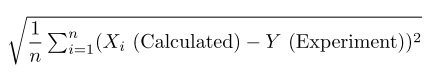

In [1]:
import numpy as np
import pandas as pd
import timeit

#### Task 1:
Create to following two user-defined function that encodes the RMSE equation given above:

##### 1. A user-defined function that is written using regular Python lists

In [2]:
def calc_rmse_with_lists(values):
    """
    Calculate the RMSE value based on the measured data.
    
    Parameters:
    values (list): The input is a python list containing the values from the simulation.
    
    Returns:
    float: The RMSE-value for the simulated values.
    """
    if not isinstance(values, list):
        raise ValueError("Input must be a Python list.")
    
    water_density = 0.995659
    n = len(values)
    
    if n == 0:  # list can not be empty
        return 0
    
    squared_diff_sum = sum((value - water_density) ** 2 for value in values)
    
    rmse = (squared_diff_sum / n) ** 0.5
    return rmse

##### 2. A user-defined function that is written to maximize the equation's performance by using Numpy and its functions

In [3]:
def calc_rmse_with_numpy(values):
    """
    Calculate the RMSE value based on the measured data using NumPy for performance optimization.
    
    Parameters:
    values (array-like): The input is a NumPy array or a list containing the values from the simulation.
    
    Returns:
    float: The RMSE-value for the simulated values.
    """
    values = np.asarray(values)
    
    water_density = 0.995659
    
    if values.size == 0:  # Check for empty array
        return 0
    
    squared_diff = (values - water_density) ** 2
    rmse = np.sqrt(np.mean(squared_diff))
    return rmse

#### Task 2:
Read the data contained in the CSV-formatted file, and compute the RMSE of the simulated water density with respect to the experimental value using each of your functions:

In [4]:
simulation_values = pd.read_csv('density.csv')

#cleaning rows, were the density is NaN
simulation_values.dropna(inplace=True)

simulation_values

,Time,Density
21,21.0,0.7080
22,22.0,0.7264
23,23.0,0.7456
24,24.0,0.7627
25,25.0,0.7819
...,...,...
1116,1116.0,0.9990
1117,1117.0,0.9945
1118,1118.0,0.9927
1119,1119.0,1.0011


In [5]:
density_values = simulation_values.iloc[:, 1].to_list()  #converting to a python list

rmse_list = calc_rmse_with_lists(density_values)
rmse_numpy = calc_rmse_with_numpy(density_values)

print(f"RMSE-value calculated with a python list: {rmse_list:0.6e},")
print(f"RMSE-value calculated with NumPy: {rmse_numpy:0.6e}")

RMSE-value calculated with a python list: 2.109178e-02,
RMSE-value calculated with NumPy: 2.109178e-02


#### Task 3:
Evaluate the speed of performance between your two functions (Taks 1) by computing the RMSE of the simulated water density. You will use the timeit library for this, and assign its "number" parameter to 20,000.

In [6]:
list_time = timeit.timeit(lambda: calc_rmse_with_lists(density_values), number=20000)
numpy_time = timeit.timeit(lambda: calc_rmse_with_numpy(density_values), number=20000)

rmse_list = calc_rmse_with_lists(density_values)
rmse_numpy = calc_rmse_with_numpy(density_values)

print(f"RMSE-value calculated with a Python list: {rmse_list:0.6e}, time: {list_time:0.4f} seconds.")
print(f"RMSE-value calculated with NumPy: {rmse_numpy:0.6e}, time: {numpy_time:0.4f} seconds.")

RMSE-value calculated with a Python list: 2.109178e-02, time: 2.2103 seconds.
RMSE-value calculated with NumPy: 2.109178e-02, time: 0.8602 seconds.


#### Conclusion:
This project compared the performance of NumPy and regular Python lists in calculating the RMSE of simulated water density. By running each function 20,000 times with timeit, the NumPy-based function was found to be up to 3 times faster than the Python list version. This speed difference is due to NumPy’s optimized array operations, which are more efficient for numerical computations. The project highlights the performance benefits of NumPy, especially for large datasets.

#### References
1. M. Vedamuthu, S. Singh, and G.W. Robinson. Properties of liquid water: origin of the density anomalies. The Journal of Physical Chemistry, 98 (1994): 2222-2230